In [ ]:
!pip install matplotlib networkx numpy



Iteration 1
Tours: [['F', 'C', 'E', 'D', 'B', 'A'], ['E', 'D', 'B', 'A', 'F', 'C'], ['A', 'B', 'F', 'E', 'C', 'D']]
Lengths: [16, 18, 17]
Updated Pheromone Levels:
('A', 'B'): 18.1879
('A', 'C'): 0.5000
('A', 'D'): 0.5000
('A', 'E'): 0.5000
('A', 'F'): 6.0556
('B', 'C'): 0.5000
('B', 'D'): 12.3056
('B', 'E'): 0.5000
('B', 'F'): 6.3824
('C', 'D'): 6.3824
('C', 'E'): 12.6324
('C', 'F'): 12.3056
('D', 'E'): 12.3056
('D', 'F'): 0.5000
('E', 'F'): 6.3824
('B', 'A'): 18.1879
('C', 'A'): 0.5000
('D', 'A'): 0.5000
('E', 'A'): 0.5000
('F', 'A'): 6.0556
('C', 'B'): 0.5000
('D', 'B'): 12.3056
('E', 'B'): 0.5000
('F', 'B'): 6.3824
('D', 'C'): 6.3824
('E', 'C'): 12.6324
('F', 'C'): 12.3056
('E', 'D'): 12.3056
('F', 'D'): 0.5000
('F', 'E'): 6.3824

Iteration 2
Tours: [['F', 'C', 'E', 'D', 'B', 'A'], ['E', 'D', 'B', 'A', 'F', 'C'], ['A', 'B', 'F', 'E', 'C', 'D'], ['C', 'E', 'D', 'B', 'A', 'F'], ['E', 'C', 'D', 'B', 'F', 'A'], ['F', 'B', 'A', 'C', 'E', 'D']]
Lengths: [16, 18, 17, 12, 18, 19]
Updated 

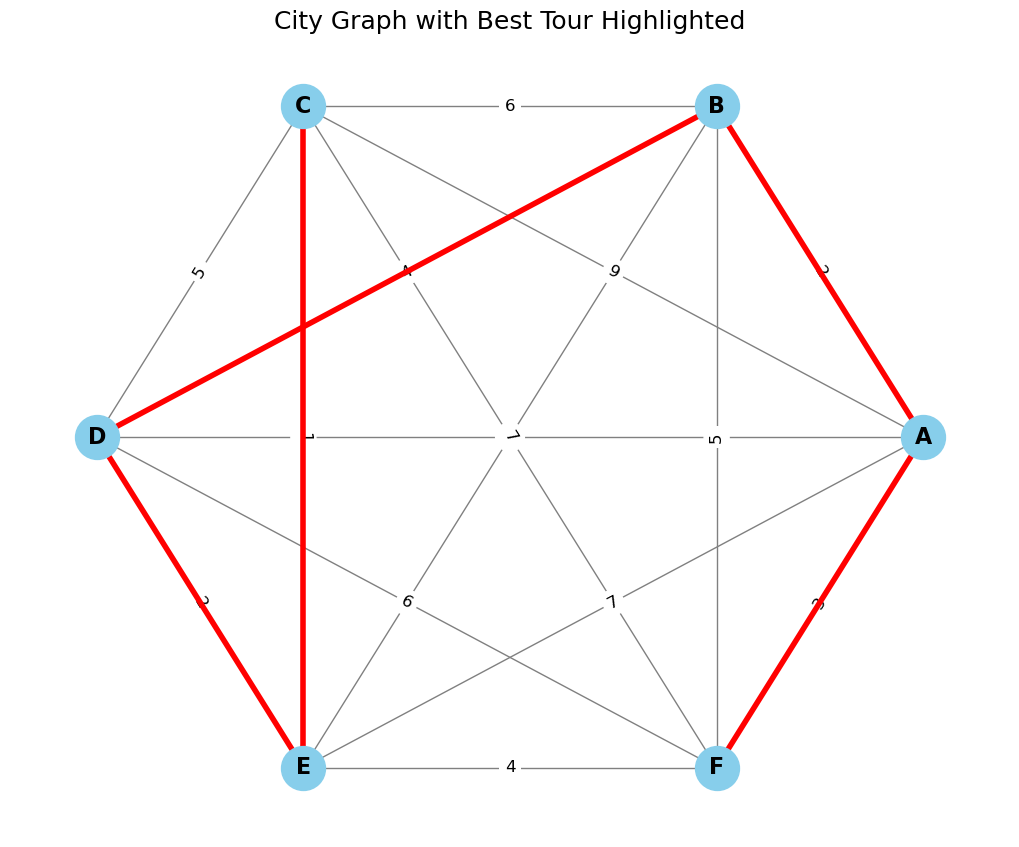

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the cities and distances
cities = ['A', 'B', 'C', 'D', 'E', 'F']
distance = {
    ('A', 'B'): 2, ('A', 'C'): 9, ('A', 'D'): 8, ('A', 'E'): 7, ('A', 'F'): 3,
    ('B', 'C'): 6, ('B', 'D'): 4, ('B', 'E'): 3, ('B', 'F'): 5,
    ('C', 'D'): 5, ('C', 'E'): 1, ('C', 'F'): 7,
    ('D', 'E'): 2, ('D', 'F'): 6,
    ('E', 'F'): 4
}
# Make distances symmetric
for (i, j), d in list(distance.items()):
    distance[(j, i)] = d

# ACO Parameters
alpha = 1
beta = 2
rho = 0.5
Q = 100
n_ants = 3
n_iterations = 2

# Initialize pheromones
pheromone = {edge: 1.0 for edge in distance}

# Heuristic (1/distance)
heuristic = {edge: 1.0 / d for edge, d in distance.items()}

# Function to choose next city
def select_next_city(current_city, visited):
    denom = sum((pheromone[(current_city, j)]**alpha) * (heuristic[(current_city, j)]**beta)
                for j in cities if j not in visited)
    probabilities = {}
    for j in cities:
        if j not in visited:
            numerator = (pheromone[(current_city, j)]**alpha) * (heuristic[(current_city, j)]**beta)
            probabilities[j] = numerator / denom
    return probabilities

# ACO main loop
all_tours = []
all_lengths = []

for iteration in range(n_iterations):
    for ant in range(n_ants):
        current_city = np.random.choice(cities)
        tour = [current_city]
        visited = set(tour)

        while len(tour) < len(cities):
            probs = select_next_city(current_city, visited)
            next_city = np.random.choice(list(probs.keys()), p=list(probs.values()))
            tour.append(next_city)
            visited.add(next_city)
            current_city = next_city

        all_tours.append(tour)

        # Calculate total tour length
        length = sum(distance[(tour[i], tour[i+1])] for i in range(len(tour)-1))
        all_lengths.append(length)

    # Pheromone evaporation
    for edge in pheromone:
        pheromone[edge] *= (1 - rho)

    # Pheromone update
    for tour, length in zip(all_tours, all_lengths):
        for i in range(len(tour)-1):
            pheromone[(tour[i], tour[i+1])] += Q / length
            pheromone[(tour[i+1], tour[i])] += Q / length

    # Display result after iteration
    print(f"\nIteration {iteration+1}")
    print("Tours:", all_tours)
    print("Lengths:", all_lengths)
    print("Updated Pheromone Levels:")
    for edge in pheromone:
        print(f"{edge}: {pheromone[edge]:.4f}")

# Find the best tour
best_index = np.argmin(all_lengths)
best_tour = all_tours[best_index]
best_length = all_lengths[best_index]
print(f"\nBest Tour: {best_tour} with length {best_length}")

# Visualization
G = nx.Graph()

# Add nodes
G.add_nodes_from(cities)

# Add weighted edges
for (i, j), d in distance.items():
    if i < j:  # avoid duplicate edges
        G.add_edge(i, j, weight=d)

# Position nodes in a circular layout
pos = nx.circular_layout(G)

# Draw the basic graph
plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=16, font_weight='bold', edge_color='gray')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

# Highlight best tour
best_edges = [(best_tour[i], best_tour[i+1]) for i in range(len(best_tour)-1)]
nx.draw_networkx_edges(G, pos, edgelist=best_edges, width=4, edge_color='red')

plt.title('City Graph with Best Tour Highlighted', fontsize=18)
plt.show()
